## The PPDAC Cycle

In this notebook, I will use the PPDAC concept, learnt from the ,,The art of statistics. Learning from Data", written by David Spiegelhalter.


### Part 1:

__1. PROBLEM__ 

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

__2. PLAN__

In the first part, I will collect, clean and make feature engineering on the data. 

After I make EDA (Exploratory Data Analyis) on the data, I should make a predictive model (supervised model) in order to predict whether a person will survive or not, based on the attributes it has. I will measure the metrics for more algorithms and compare them in order to find the best algorithm for this data-set.


### Part 2:

__3. DATA__

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In this part, I will clean the data and manage it in order to make a better anaysis.

__4. ANALYSIS__

In this part, I will perform EDA. I will explore the data with descriptive statistics and summarize our variables. In this section, features will be classified and correlations will be made between variables.

Also, in this section I will build some Supervised Machine Learning models in order to find which works best for this particular data-set.

__5. CONCLUSION__

We will interpretate the metrics found out in Chapter 4 and make conclusions about the data set.

## Part 2: 

## 3: Collect, Manage and Clean Data

Since the data was given to us, all we have to do is clean it.


### Step 3.1 Import Libraries

In [3]:
import numpy as np   #foundational package for scientific computing
import pandas as pd  #collection of functions for data processing and analysis modeled after R dataframes with SQL like features

#Visualization
import matplotlib.pyplot as plt #collection of functions for scientific and publication-ready visualization
import seaborn as sns

# Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics	
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 3.2 Overview data

In [4]:
#Convert CSV for train to pandas df
data_train =  pd.read_csv("train.csv")
#Convert CSV for test to pandas df
data_test =  pd.read_csv("test.csv")
#Combine test and train for cleaning
data = pd.concat([data_train, data_test], axis = 0, sort = False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
#Check for any duplicated data
data.duplicated().sum()

0

In [7]:
#Show statistics about the data
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


### Step 3.3 Clean Data

There are four columns with missing values (Age, Cabin, Fare, Embarked). Survived column has Nulls because the Test dataset does not have that information (that is the task).

In [8]:
# First, let's see how many null values are in the dataset
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

The Cabin variable can be used to determine the approximate position on ship when the incident occured. However, since there are way too many null values, I will drop it.

In [9]:
#We will complete the missing values and drop unnecessary columns

#Complete Embarked with the mode (the value that repeats the most) -> is discrete so mode makes sense
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

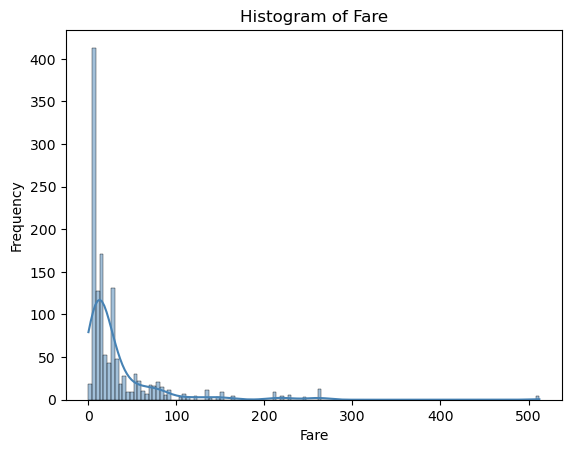

In [10]:
#For Fare column, we should see the distribution in order to decide if the median, mean or mode value is better for rilling null
#We will do this by making a histogram of the Fare column

sns.histplot(data['Fare'], kde = True, color='steelblue')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency');

Original Fare variable variance:  51.75866823917414
Fare variance after filling missing values with median:  51.74149976752607
Fare variance after filling missing values with mean:  51.73887903247138
Fare variance after filling missing values with mode:  51.74358404556633


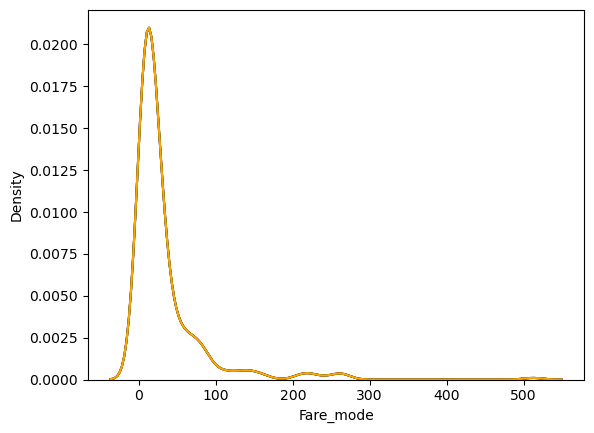

In [11]:
#In general, if the distribution is skewed, median is prefered. But, to do as an experiment,
#let's check the variances of: before, after filling with mean, after filling with median, after filling with mode

data["Fare_mean"]   = data["Fare"].fillna(data["Fare"].mean())
data["Fare_median"] = data["Fare"].fillna(data["Fare"].median())
data["Fare_mode"]   = data["Fare"].fillna(data["Fare"].mode()[0])

print("Original Fare variable variance: ", data["Fare"].std())
print("Fare variance after filling missing values with median: ", data["Fare_median"].std())
print("Fare variance after filling missing values with mean: "  , data["Fare_mean"].std())
print("Fare variance after filling missing values with mode: "  , data["Fare_mode"].std())



sns.distplot(data["Fare"], hist = False, kde = True, bins = 5, color = 'blue')
sns.distplot(data["Fare_mean"], hist = False, kde = True, bins = 5, color = 'red')
sns.distplot(data["Fare_median"], hist = False, kde = True, bins = 5, color = 'green')
sns.distplot(data["Fare_mode"], hist = False, kde = True, bins = 5, color = 'orange');

#Since the distributions are the same, in this case is kind of irrelevant since the changes are really small
#But, in general, where the distribution is skewed, the median is preffered to mode 
# + the median's standard deviation is closest to the original variance compared to the mean's std

#Drop the columns since the analysis is finished
data = data.drop(columns=["Fare_median", "Fare_mean", "Fare_mode"])

In [12]:
#Complete Fare with the median value (continous variable)
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

#Drop the Cabin column
data = data.drop(columns=["Cabin", "Ticket"])

In [13]:
#For the Age column, I will extract the title and based on it, I will complete the missing values

def extract_title(name : str):
    '''
    The function's role is to extract the person title from the Name column
    
    Parameters:
    name -> The full name of the person.
    
    Return:
    title -> The extracted title, converted to lowercase and stripped of unwanted characters.
    '''
    
    # Split the text by commas and get the second element
    title_section = name.split(", ")[1]
    
    # Split the title section into words
    words = title_section.split(".")
    
    #We apply .lower() to make the text lowercase and .strip() to get rid of unwanted characters
    title = words[0].lower().strip('., ')
    
    return title

# Make a new column named Title and extract the titles
data["Title"] = data["Name"].apply(extract_title)

print(data["Title"].value_counts())

# In this case, we know the titles, but we have to make the assumption that there could be more.
# So I am going to make a special category called rare_titles

#Count the occurances of each title
title_counts = data["Title"].value_counts()

#I set the treshold to 10 (arbitrary)
rare_titles = title_counts[title_counts < 10].index

#Put all the titles with less than 10 occurances in a special category called "rare_titles"
data.loc[data["Title"].isin(rare_titles), "Title"] = "rare_titles"

print(data["Title"].value_counts())

Title
mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: count, dtype: int64
Title
mr             757
miss           260
mrs            197
master          61
rare_titles     34
Name: count, dtype: int64


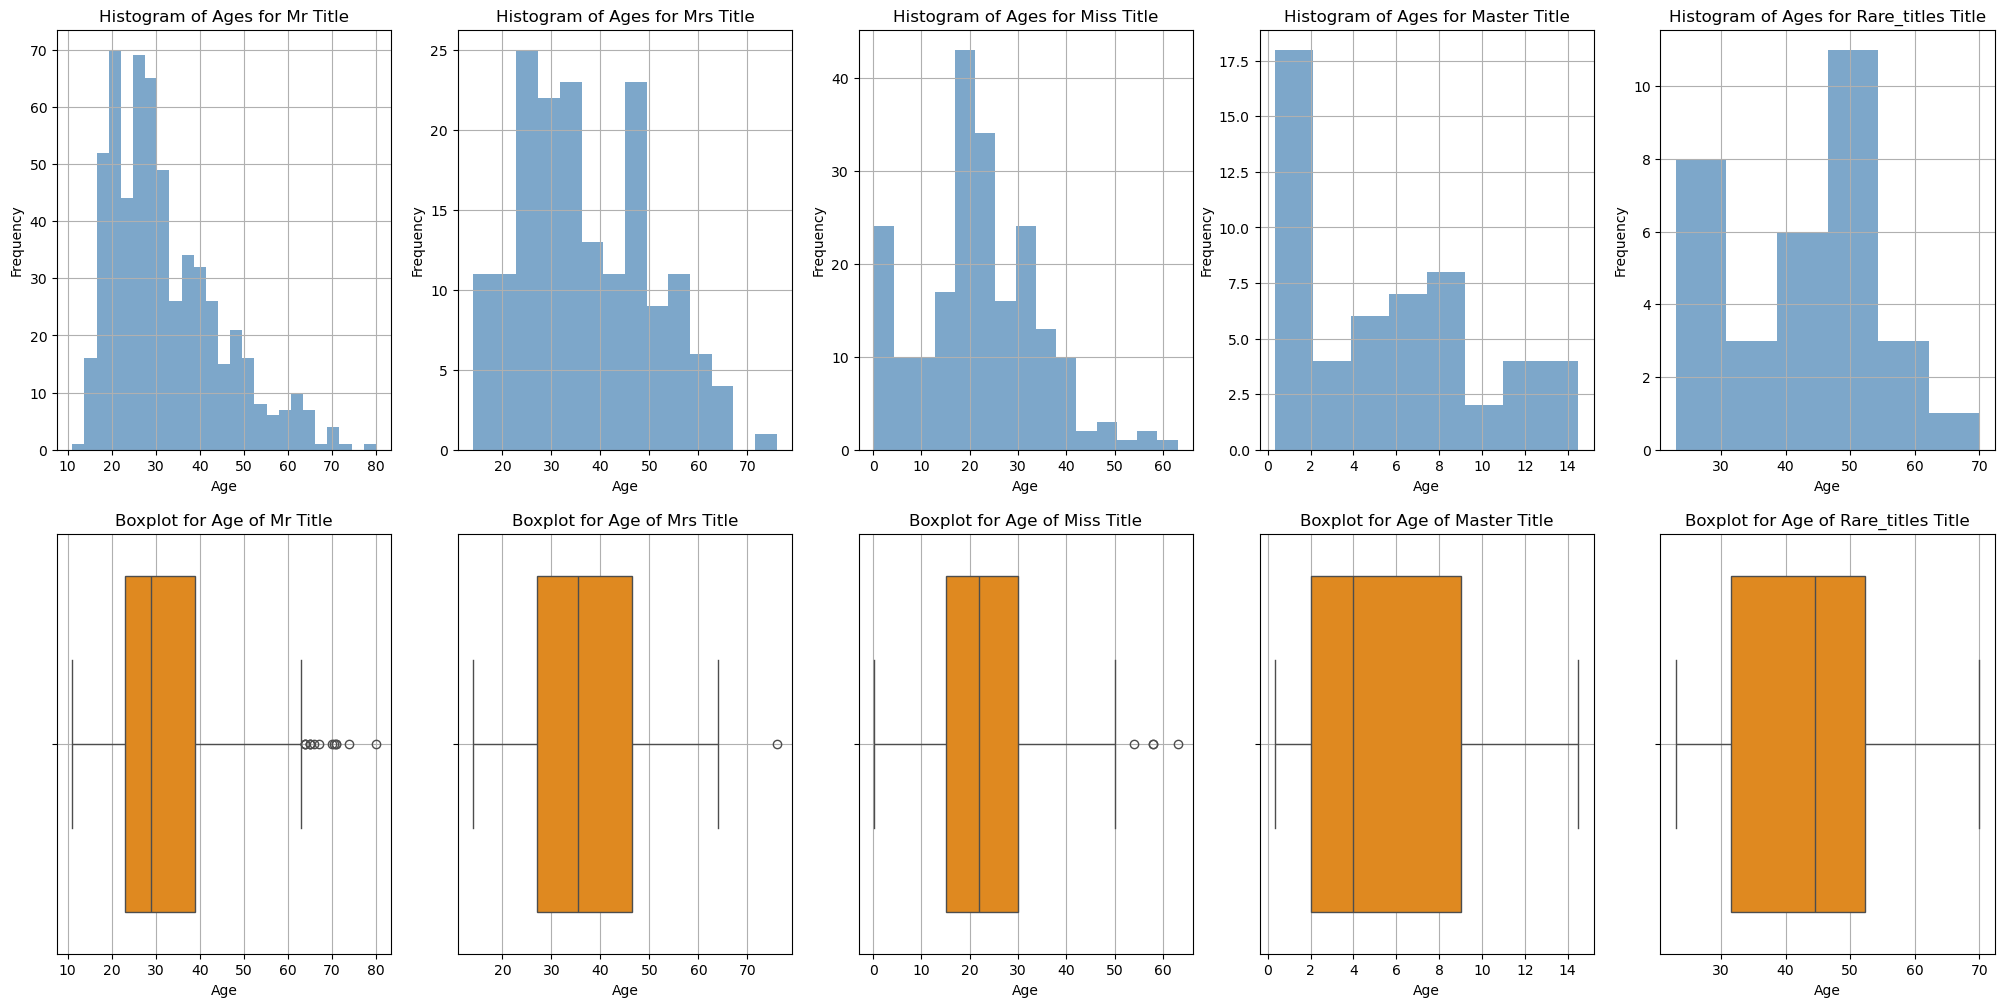

Title
mr             752
miss           210
mrs            196
master         117
rare_titles     34
Name: count, dtype: int64


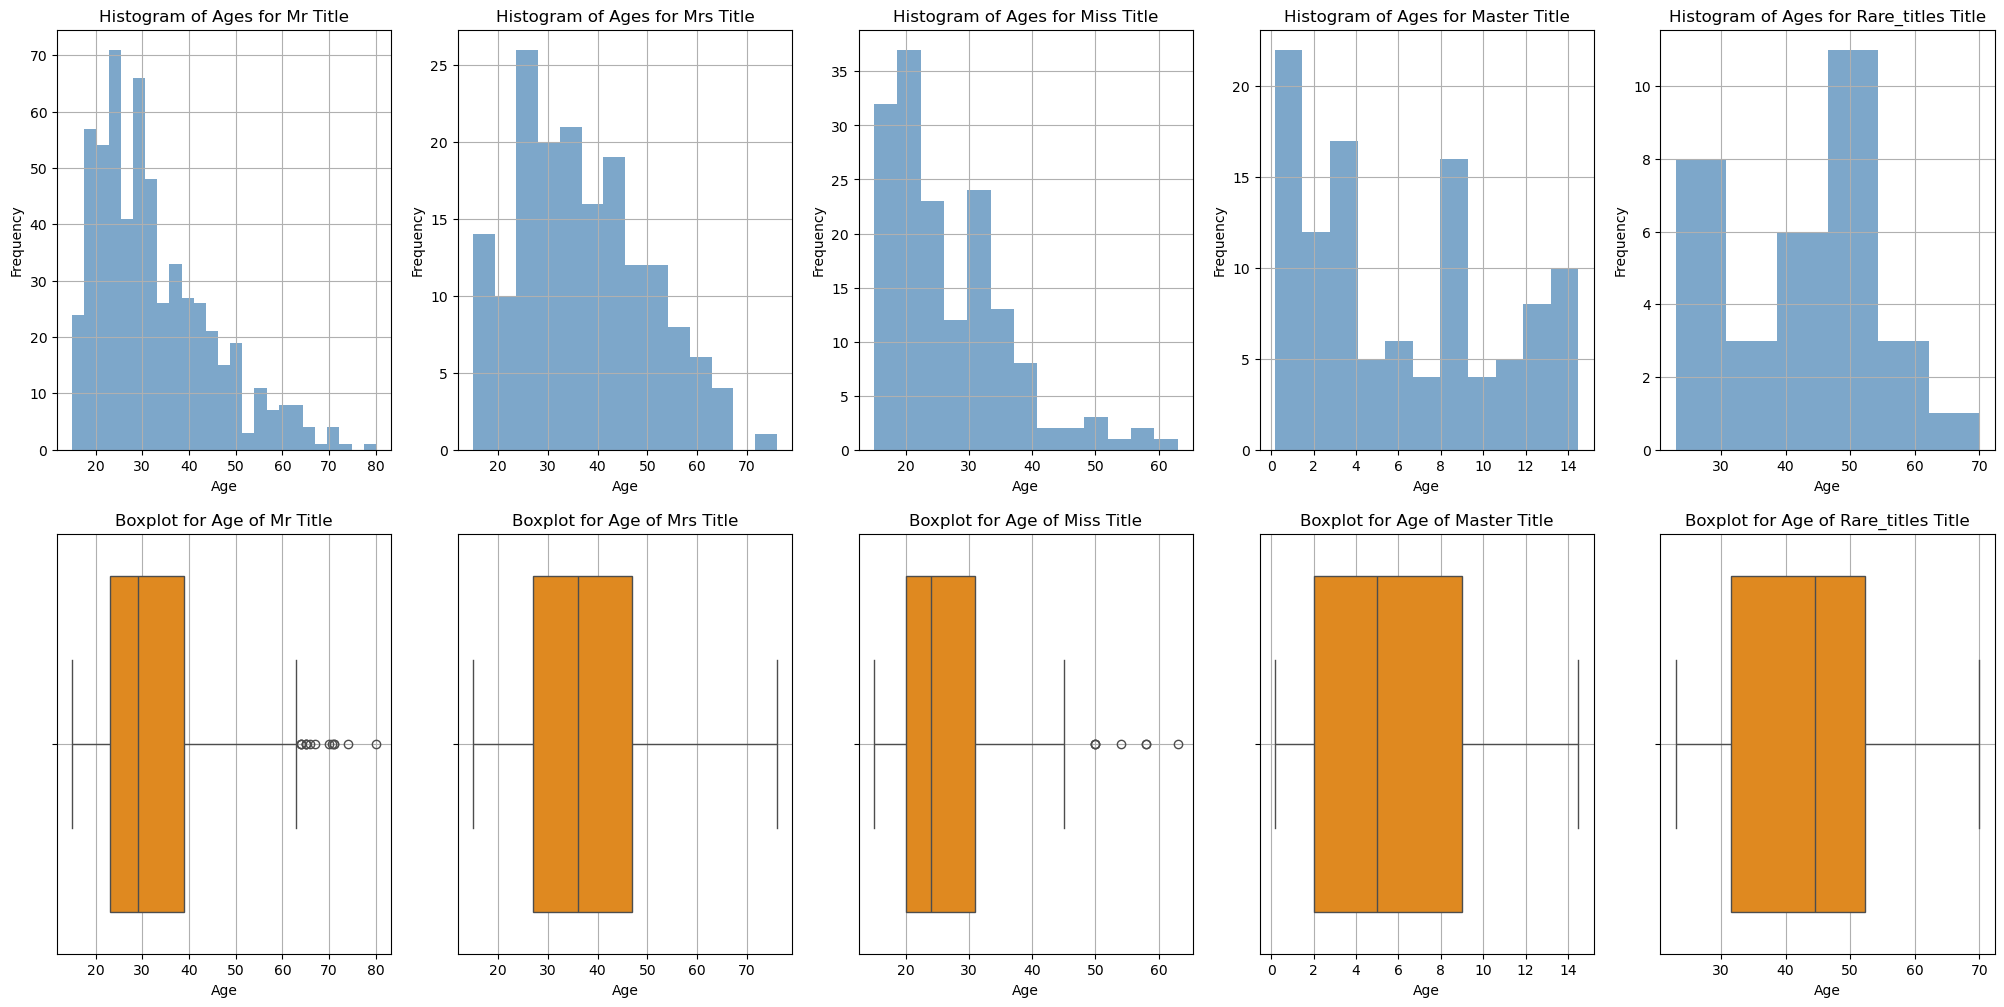

In [14]:
def plot_histogram_and_boxplot(df : pd.DataFrame):
    
    '''
    This functions' role is to plot for each title the histogram and boxplot.
    
    Parameters:
    data(pd.DataFrame) -> The dataframe containing the data to plot
    
    Return:
    None. This function outputs the plots.
    '''
    
    #Extract unique titles
    titles = df["Title"].unique()
    
    # Determine the number titles
    num_titles = len(titles)
    
    # Create subplots with 2 rows and num_titles columns
    fig, axes = plt.subplots(2, num_titles, figsize=(5 * num_titles, 12)) 
    
    for i, title in enumerate(titles):
    
        #We make the filter to filter the dataframe to get only the ages of those with the title: title
        mask_age = ((df["Title"] == title) & (df["Age"].notnull()))
        df_hist = df[mask_age]
        
        #We calculate the optimal number of bins
        nr_bins = int(np.floor(np.sqrt(df_hist["Age"].count())) + 1)

        # Plot histogram
        ax_hist = axes[0, i]
        ax_hist.hist(df_hist["Age"], bins=nr_bins, color="steelblue", alpha=0.7)
        ax_hist.set_xlabel("Age")
        ax_hist.set_ylabel("Frequency")
        ax_hist.set_title(f"Histogram of Ages for {title.capitalize()} Title")
        ax_hist.grid()

        # Plot boxplot
        ax_box = axes[1, i]
        sns.boxplot(x=df_hist["Age"].reset_index(drop=True), ax=ax_box, color = "darkorange")
        ax_box.set_title(f"Boxplot for Age of {title.capitalize()} Title")
        ax_box.grid()
    
    plt.show()


plot_histogram_and_boxplot(data)

# From the graphs below, we see that Master tile, which are kids have the ages approximately between (0, 15)
#So, I am goin to convert the title for all the people with the age < 15 to master
data.loc[data["Age"] < 15, "Title"] = "master"
print(data["Title"].value_counts())

plot_histogram_and_boxplot(data)

In [15]:
#Complete Age with the median value for each title (continous variable) 

data_mean_age_title = round(data["Age"].groupby(data["Title"]).median(), 1).reset_index().set_index("Title")
data.loc[data["Age"].isnull(), "Age"] = data.loc[data["Age"].isnull(), "Title"].map(data_mean_age_title["Age"]) 

### Step 3.4 Feature Engineering + Convert Formats

We will generate new columns with respect to the columns we already have in order to put into the spotlight new information.

We will convert categorical data to numbers in order to be able to make analysis on that data.


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,mr


In [18]:
# We combine SibSp and Parch into one single column named: ,,Family"
data["Family"] = data["SibSp"] + data["Parch"] + 1

#IF there is only 1 member in the family, maybe it would be better to also have a binary column
data["Single"] = 1
data.loc[data["Family"] != 1, "Single"] = 0

In [19]:
# We should split the train and test sets into 2 separate values since we finished cleanin the dataset

train = data.loc[data["Survived"].notnull()]
test  = data.loc[data["Survived"].isnull()]

#Convert Survived data type from float to int64
train["Survived"] = train["Survived"].astype('int64')

### Step 3.5 Final Check of Cleaned Data

We should make a final check in order to find out if there are any missing values before starting the EDA process.

In [20]:
print('Train columns with null values: \n', train.isnull().sum())
print('-' * 10)

print('Test columns with null values: \n', test.isnull().sum())
print('-' * 10)

Train columns with null values: 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Family         0
Single         0
dtype: int64
----------
Test columns with null values: 
 PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
Family           0
Single           0
dtype: int64
----------


## 4: Analysis

### 4.1 Visualizing and analyzing the data

Since we cleaned our data, we can explore the data with descriptive statistics to describe the variables. We will find the correlations between inputs and output.

In [21]:
#First we will make a function in order to see:
# 1. how many people were male/female and the proportion they represented from the population
# 2. how many people  suvived/died and the proportion they represented from the population

def split_population_by_category(data : pd.DataFrame, columns: list, category : str):
    
    '''
     Plots count plots for each feature in the specified columns,
     split by the values in the specified category column, and prints the percentage,
     distribution of the category values for each feature.
     
     Parameters:
     data(pd.DataFrame) -> The dataframe containing the data to plot and analyze.
     columns (list of str) -> The list of column names for which to create count plots.
     category (str): The column name by which to split the count plots and calculate percentages.
     
     Returns:
     None: The function outputs the plots and prints the percentage tables.
     
    '''
    # Determine the number of rows needed based on the number of columns to plot
    n_rows = len(columns)
    
    # Create a figure with a 2-column grid
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows))
    sns.set(font_scale=1.2)
    sns.set_style('ticks')
    
    
    # Get unique values of the category column
    unique_values = data[category].unique()
    
    # Determine the number of unique values
    num_unique_values = len(unique_values)
    
    # Create a palette with unique colors for each category value
    palette = sns.color_palette("dark", len(unique_values))
    color_dict = dict(zip(unique_values, palette))
    
    
    #Initialize a dictionary to store percentage values
    percentage_values = {}

    for i, feature in enumerate(columns):
        
        # Calculate total count for each category
        total_count = data.groupby(feature).size()

        # Calculate count for each category split by 'Sex'
        count_by_category = data.groupby([feature, category]).size().unstack().fillna(0)

        # Calculate percentages
        percentage_by_category = (count_by_category.div(total_count, axis=0) * 100).round(2)

        # Store the results
        percentage_values[feature] = percentage_by_category
        
        # Plot count plot on the first column
        sns.countplot(data=data, x=feature, hue=category, palette=color_dict, ax=axes[i, 0])
        axes[i, 0].set_title(f"Count Distribution of {feature} by {category}")
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Count')

        # Plot percentage plot on the first column
        #From a reason or another, if I do not put rot = 0, default is 90 even though in official documentation it says None
        percentage_by_category.plot(kind='bar', stacked=False, ax=axes[i, 1], color=color_dict, rot = 0) 
        axes[i, 1].set_title(f"Percentage Distribution of {feature} by {category}")
        axes[i, 1].set_ylabel("Percentage")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].legend(title=category)

    plt.tight_layout()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the spacing
    plt.show()

    # Print the percentage values
    #for feature, df in percentage_values.items():
    #    print(f"Percentage values for {feature}:")
    #    print(df)
    #    print("\n")
        
        
discrete_columns_for_train = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Survived', 'Title', 'Family', 'Single']
discrete_columns_for_test = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Survived', 'Family', 'Single']

The following figure show us numeric columns vs Sex column.

We observe that:
Since the number of males is way bigger than the number of females, there is a mislead in the proportions. It will be more important to also analyze the same graphs as the ones below but splitted by the Survived category.
We will combine the informations from both of the graphs.

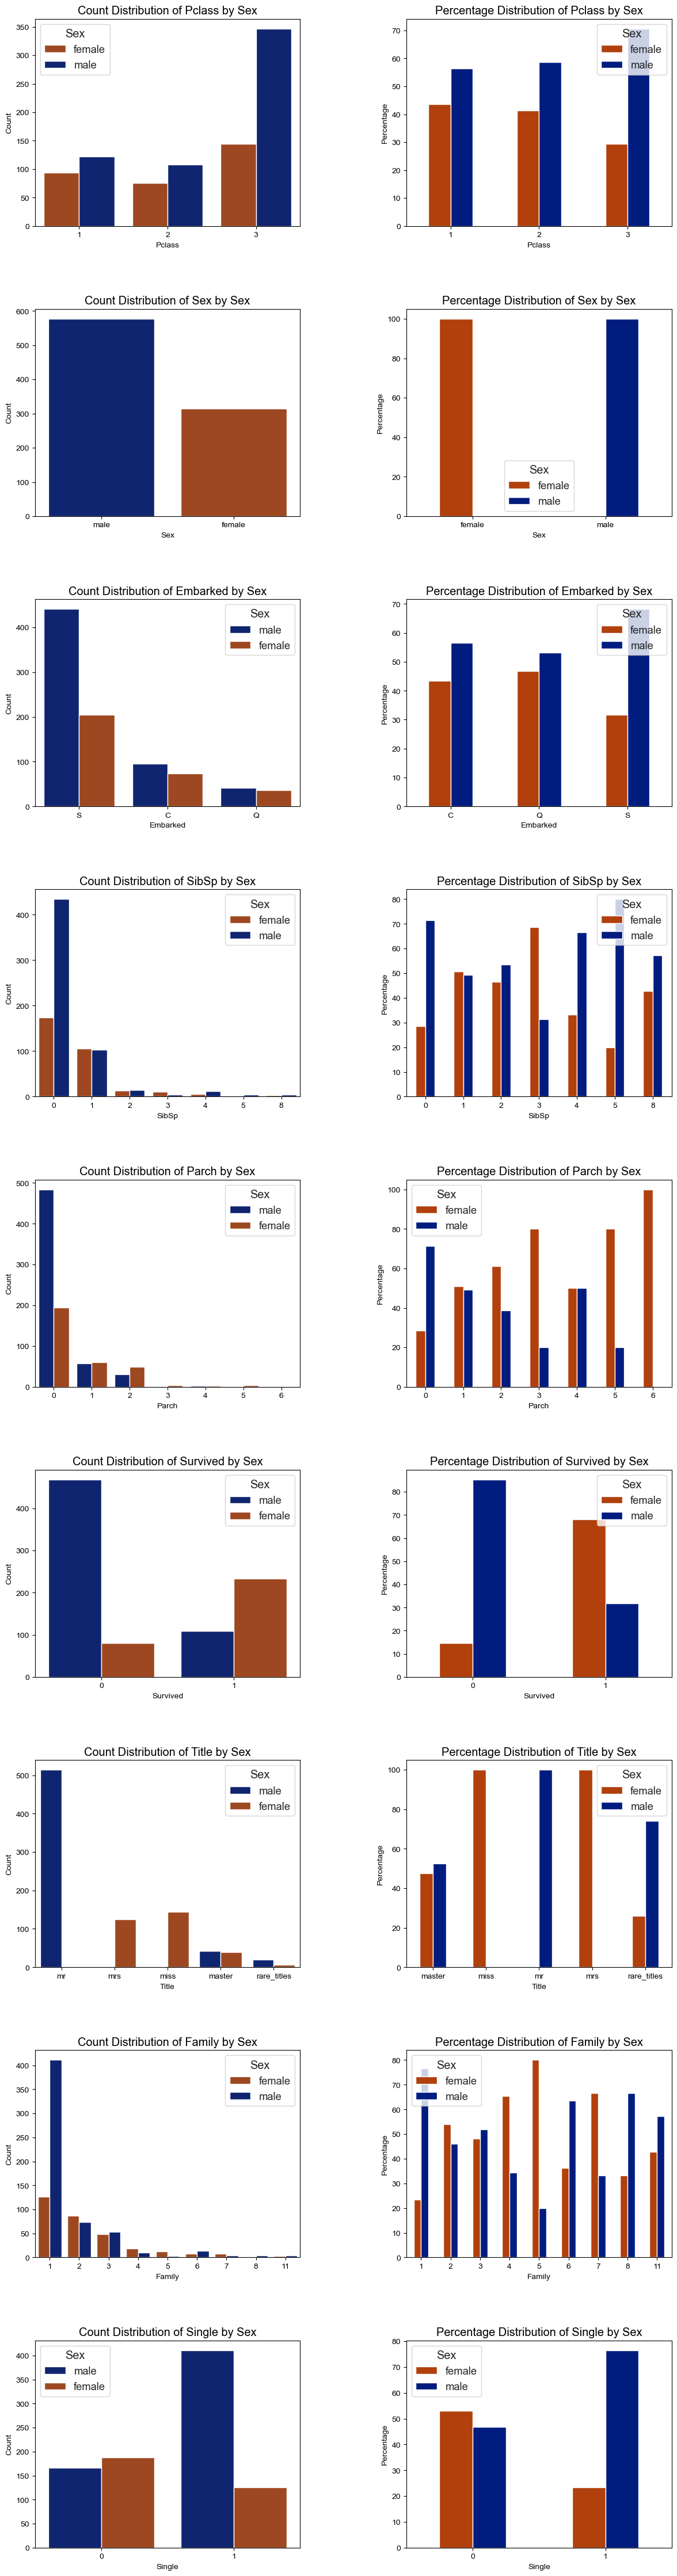

In [22]:
split_population_by_category(train, discrete_columns_for_train, 'Sex')

-  Single vs Family Survival Rates:

    - Single People:
        - 76.54% were males, 23.46% were females.
        - 30.35% of single people survived.
    - People with Families:
        - 50.56% survival rate.
        - Families with 2 to 4 members had a positive survival rate.
        - Larger families might have had better survival chances, potentially due to a higher presence of women.
- Sex and Survival:

     - Males had a significantly lower survival rate:
          - Only 18.89% of males survived.
    - Females had a higher survival rate:
         - 74.20% of females survived.
    - Sex is a critical factor in survival odds.
- Embarked Location and Survival:

    - Port "C":
        - Despite more males embarking (56.55%), survival rate was positive (55.36%).
     - Other Ports:
         - Similar proportions of women embarked and survived.
- Title and Survival:

    - Women's survival rate was very high.
    - Men's survival rate was very low.
    - Children:
        - 57.32% of children survived.
        - Validates that children, along with women, had priority in rescue efforts.

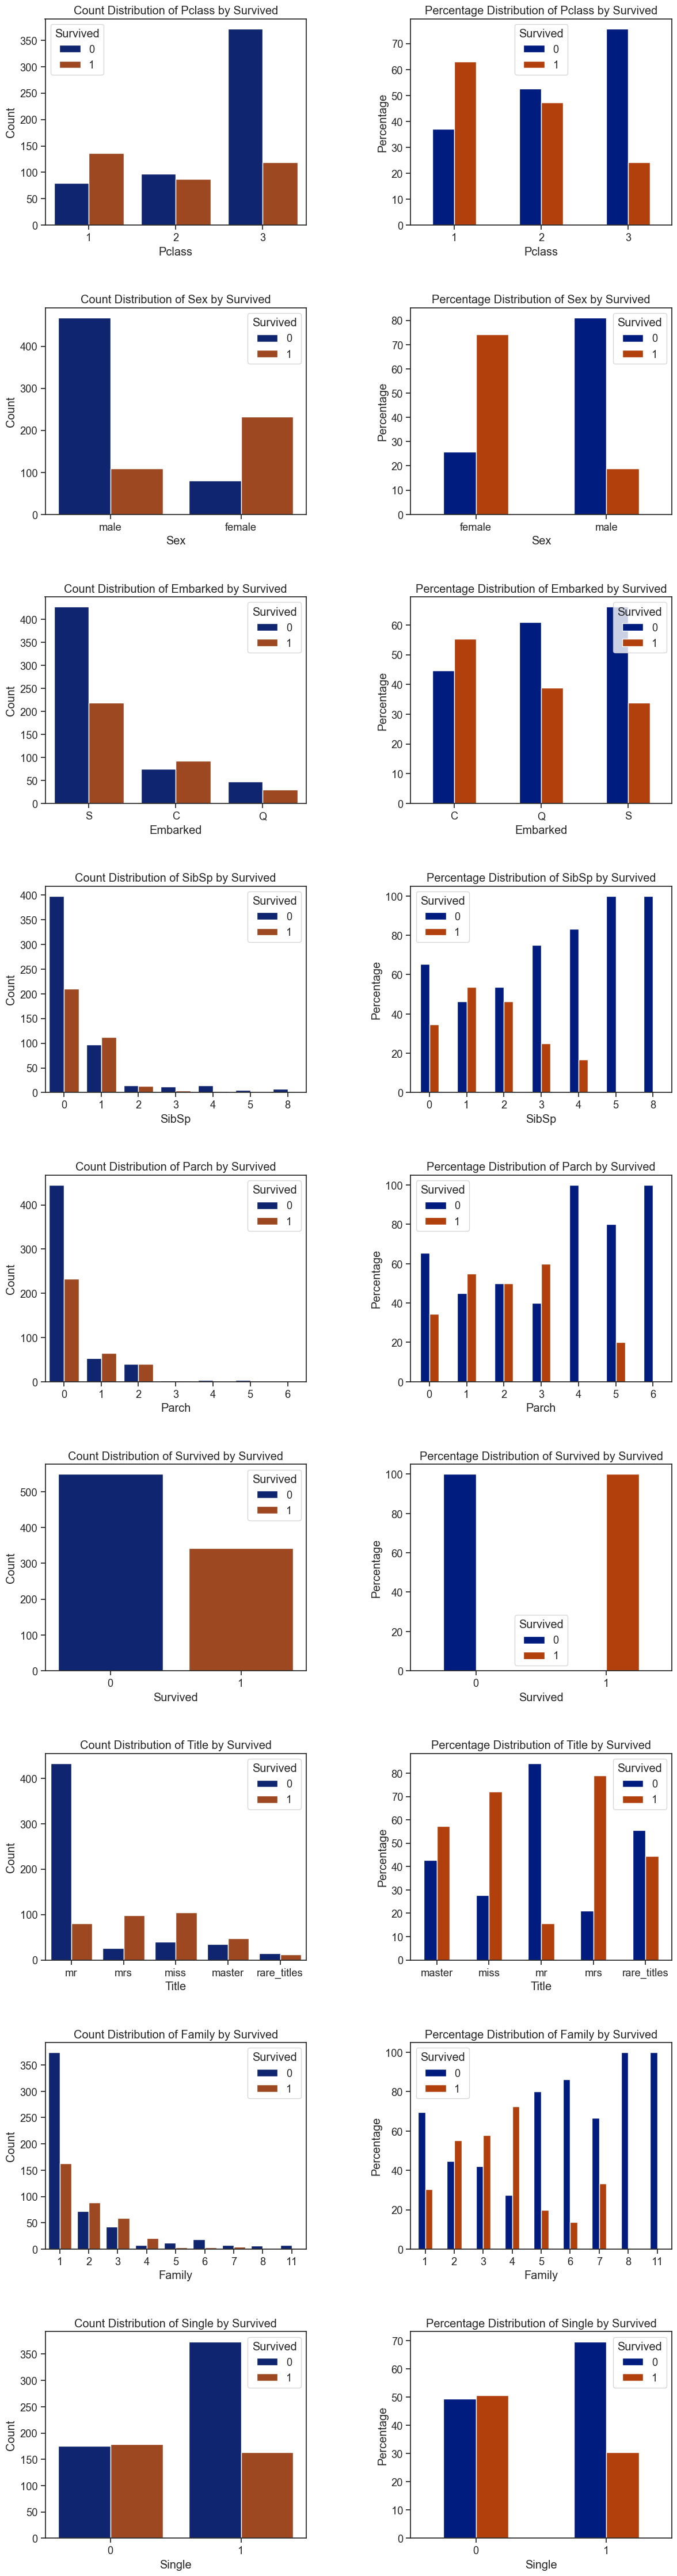

In [23]:
split_population_by_category(train, discrete_columns_for_train, 'Survived')

## We notice that families have a diverse number of members, so I put them in categories:
- 1     members    : alone we put 0
- 2 - 3 members: small family we put 1
- 4 - 5 members: big family we put 2
- 6 - 11 members: huge family we put 3

In [24]:
# Define the bins and labels based on the logic above
bins_train = [0, 2, 4, 6, train["Family"].max() + 1]
bins_test  = [0, 2, 4, 6, test["Family"].max() + 1]
labels = [0, 1, 2, 3]

# Transform the "Family" column into categories
train["Family"] = pd.cut(train["Family"], bins=bins_train, labels=labels, right=False)

test["Family"] = pd.cut(test["Family"], bins=bins_test, labels=labels, right=False) 

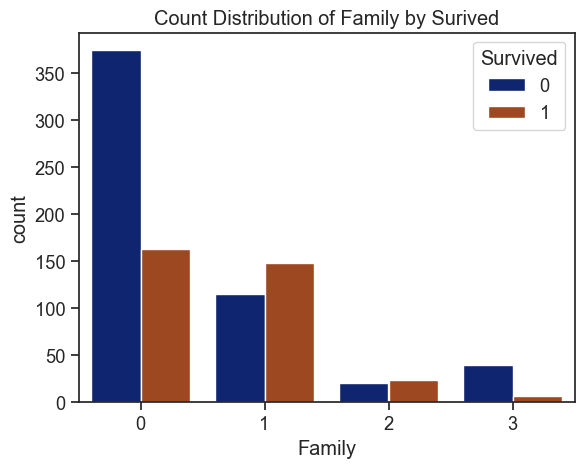

In [25]:
sns.countplot(data=train, x="Family", hue="Survived", palette="dark")
plt.title(f"Count Distribution of Family by Surived")
plt.xlabel("Family");

Next, we will make correlations for variables in order to understand which attributes are important.

First of all, we are going to convert the object attributes to int / float in order to make the proccessing easier.

In [26]:
#Now, we convert words to numbers for each column
train["Sex"]      = train["Sex"].map({"male": 0, "female": 1})
train["Embarked"] = train["Embarked"].map({"C": 0, "Q": 1, "S" : 2})

#Same thing for the test set
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})
test["Embarked"] = test["Embarked"].map({"C": 0, "Q": 1, "S" : 2})

In [27]:
# Isolate the Title column and one-hot encode it for the train DataFrame
df_onehot_title_train = pd.get_dummies(train['Title'], prefix='Title')

# Isolate the Title column and one-hot encode it for the test DataFrame
df_onehot_title_test = pd.get_dummies(test['Title'], prefix='Title')

# Convert all boolean columns to integers
df_onehot_title_train = df_onehot_title_train.astype(int)
df_onehot_title_test = df_onehot_title_test.astype(int)

# Drop the original Title column from train and test DataFrames
train = train.drop(columns=['Title'])
test = test.drop(columns=['Title'])

# Concatenate the one-hot encoded Title columns back to the original DataFrame
train = pd.concat([train, df_onehot_title_train], axis=1)
test = pd.concat([test, df_onehot_title_test], axis=1)

We observe that the variables with high correlation coefficient with respect to Survived are : 
- Pclass with: -0.338
- Sex with the highest value (as we expected) with: 0.543
- Fare with:  0.257
- Title with: 0.4054 ->  this is caused also because Title and Sex have have a high correlation coefficient (0.558)
- SIngle with: -0.203 

In [28]:
# Select all columns exept Name
corr_list = [col for col in train if col != 'Name']

#Show the correlations between quantitative variables
corr = pd.DataFrame(train[corr_list].corr())
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Single,Title_master,Title_miss,Title_mr,Title_mrs,Title_rare_titles
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.039791,-0.057527,-0.001652,0.012658,0.013128,-0.053308,0.057462,-0.036364,-0.062329,0.032051,0.016780,0.068907
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.067836,-0.035322,0.081629,0.257307,-0.167675,0.079817,-0.203367,0.123947,0.305498,-0.543225,0.336074,0.022030
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.352661,0.083081,0.018443,-0.549500,0.162098,-0.006356,0.135207,0.128666,-0.049057,0.136904,-0.148514,-0.206333
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.083743,0.114631,0.245489,0.182333,-0.108262,0.252877,-0.303646,0.082103,0.595174,-0.861366,0.545050,-0.034471
Age,0.039791,-0.067836,-0.352661,-0.083743,1.000000,-0.258440,-0.184625,0.099494,-0.021900,-0.264951,0.177221,-0.570377,-0.098684,0.203650,0.203902,0.175096
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.258440,1.000000,0.414838,0.159651,0.068230,0.807798,-0.584471,0.394953,0.004667,-0.265534,0.062217,-0.036364
Parch,-0.001652,0.081629,0.018443,0.245489,-0.184625,0.414838,1.000000,0.216225,0.039798,0.770644,-0.583398,0.369696,-0.018733,-0.338774,0.228148,-0.067480
Fare,0.012658,0.257307,-0.549500,0.182333,0.099494,0.159651,0.216225,1.000000,-0.224719,0.260684,-0.271832,-0.003306,0.138677,-0.183967,0.105697,0.024585
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.021900,0.068230,0.039798,-0.224719,1.000000,0.024496,0.063532,0.000044,-0.085769,0.101231,-0.022639,-0.061949
Family,-0.053308,0.079817,-0.006356,0.252877,-0.264951,0.807798,0.770644,0.260684,0.024496,1.000000,-0.835539,0.475661,-0.039388,-0.398608,0.245111,-0.063618


### 4.2 Making some Supervised Models

### 4.21 Decision Tree

I am going to make a 10 x 10 grid with confussion matrixes based on diffrent random_state in order to see where does the model suffer the most.

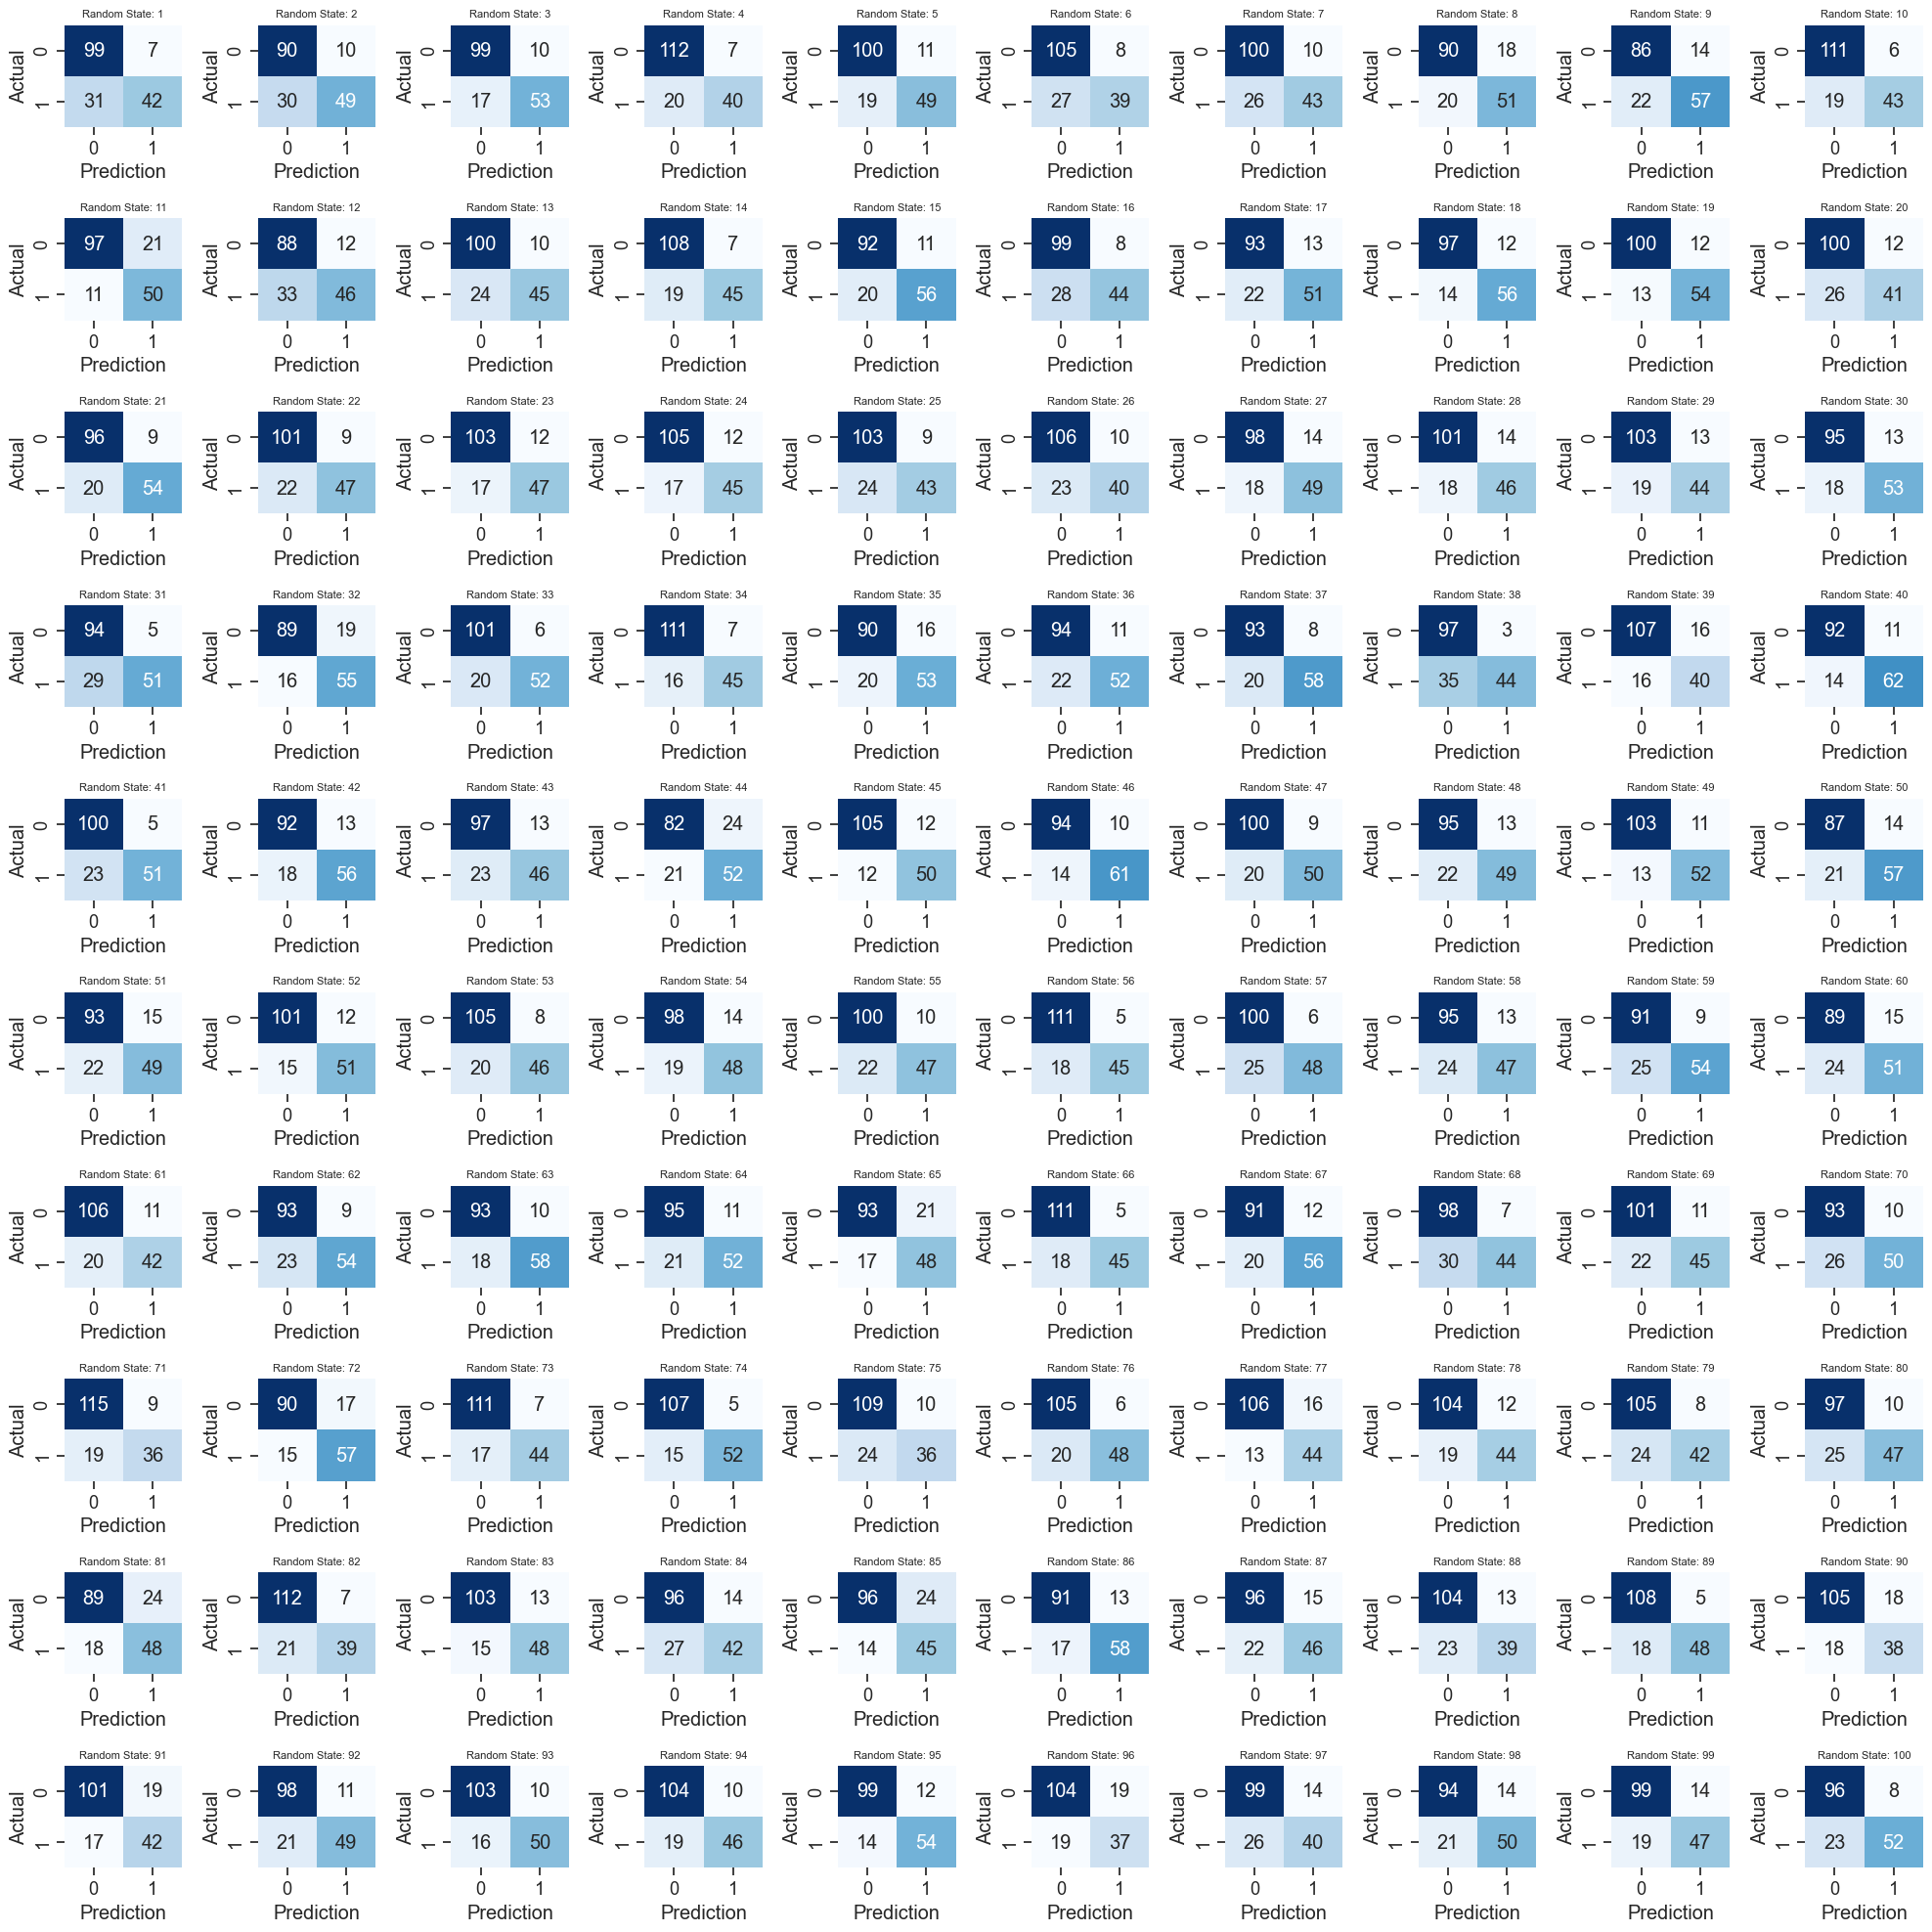

In [30]:
#Columns used for our model
columns = ["Pclass", "Sex", "Title_master", "Title_miss", "Title_mr", "Title_mrs", "Title_rare_titles",  "Fare", "Single", "Embarked", "Family"]
X = train[columns]
y = train["Survived"]

# Create a figure 10 x 10 
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
sns.set(font_scale=1.2)
sns.set_style('ticks')

#Lists which will contain the values of the Confussion Matrix
FN, FP, TN, TP = [],[],[],[]

for i in range(10):
    for j in range(10):
        random_state = i * 10 + j + 1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state) # 70% training and 30% test

        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

        # Train Decision Tree Cl#assifer
        clf = clf.fit(X_train,y_train)

        #Predict the response for test dataset using the Decision Treee
        y_pred = clf.predict(X_test)

        # Predict the response for the training dataset
        y_train_pred = clf.predict(X_train)

        # Calculate and print the accuracy for the training dataset
        train_accuracy = accuracy_score(y_train, y_train_pred)
        #print("Train Accuracy:", train_accuracy)

    
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        
        # Calculate the confusion matrix
        cf_matrix = confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(cf_matrix, index=[0,1], columns=[0,1])
        
        # Append values of confusion matrix to the list initialized earlier
        TN.append(df_cm.loc[0, 0])
        FN.append(df_cm.loc[1, 0])
        FP.append(df_cm.loc[0, 1])
        TP.append(df_cm.loc[1, 1])
        
        # Plot the confusion matrix on the corresponding subplot
        ax = axes[i, j]
        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        ax.set_xlabel('Prediction')
        ax.set_ylabel('Actual')
        ax.set_title(f'Random State: {random_state}', fontsize=8)
        
        if random_state == 20:
            # Identify False Negatives
            false_negatives_indices = X_test[(y_test == 1) & (y_pred == 0)].index
            false_negatives_rows = train.loc[false_negatives_indices]

# Adjust layout to make sure titles and labels fit
plt.tight_layout()
plt.show()

In [31]:
# Convert lists to numpy arrays
FN = np.array(FN)
FP = np.array(FP)
TN = np.array(TN)
TP = np.array(TP)

# Calculate aggregated metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TN + TP) / (TP + TN + FP + FN)

print("Aggregated Precision:", np.mean(precision))
print("Aggregated Recall:", np.mean(recall))
print("Aggregated Accuracy:", np.mean(accuracy))

Aggregated Precision: 0.8094868296042098
Aggregated Recall: 0.7023798876210523
Aggregated Accuracy: 0.8217318435754192


Interpretation:
- Aggregated Precision: 81% of the instances classified as positive by the model are actually positive
- Aggregated Recall:    the model correctly identifies about 69,9% of the actual positive instances.

Another important aspect is that, since the dataset is not balanced ( number of males vs females, number of people who survived / died), it is very much possible that the model is more likely to predict that a person died, despite his true status was to be alive. This could be the reason for the Recall value being so small.

### 4.211 Making the test CSV for kaggle

In [32]:
# Apply the model to the test set
y_pred_test = clf.predict(test[columns])

#Submit the results in a 2 column format: PassangerId and Survived
gender_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_test})
gender_submission = gender_submission.set_index("PassengerId")
gender_submission.to_csv("gender_submission.csv")

### 4.212 Presenting the results and the causes

I submitted more CSV's on kaggle and the submitted accuracy for those are:
- 0.7790
- 0.7790
- 0.7655
- 0.7775
- 0.7703
- 0.7775

The question that arise is why does it seem like it converges at the value 0.779 ?

 - We found out earlier that the model is not working properly for the FP cases, where the person was labeled as dead, despite being alive.
 - Another problem could be the number of test cases reported to the train cases. (891 for train vs 418 for test).

### 4.22 SVM

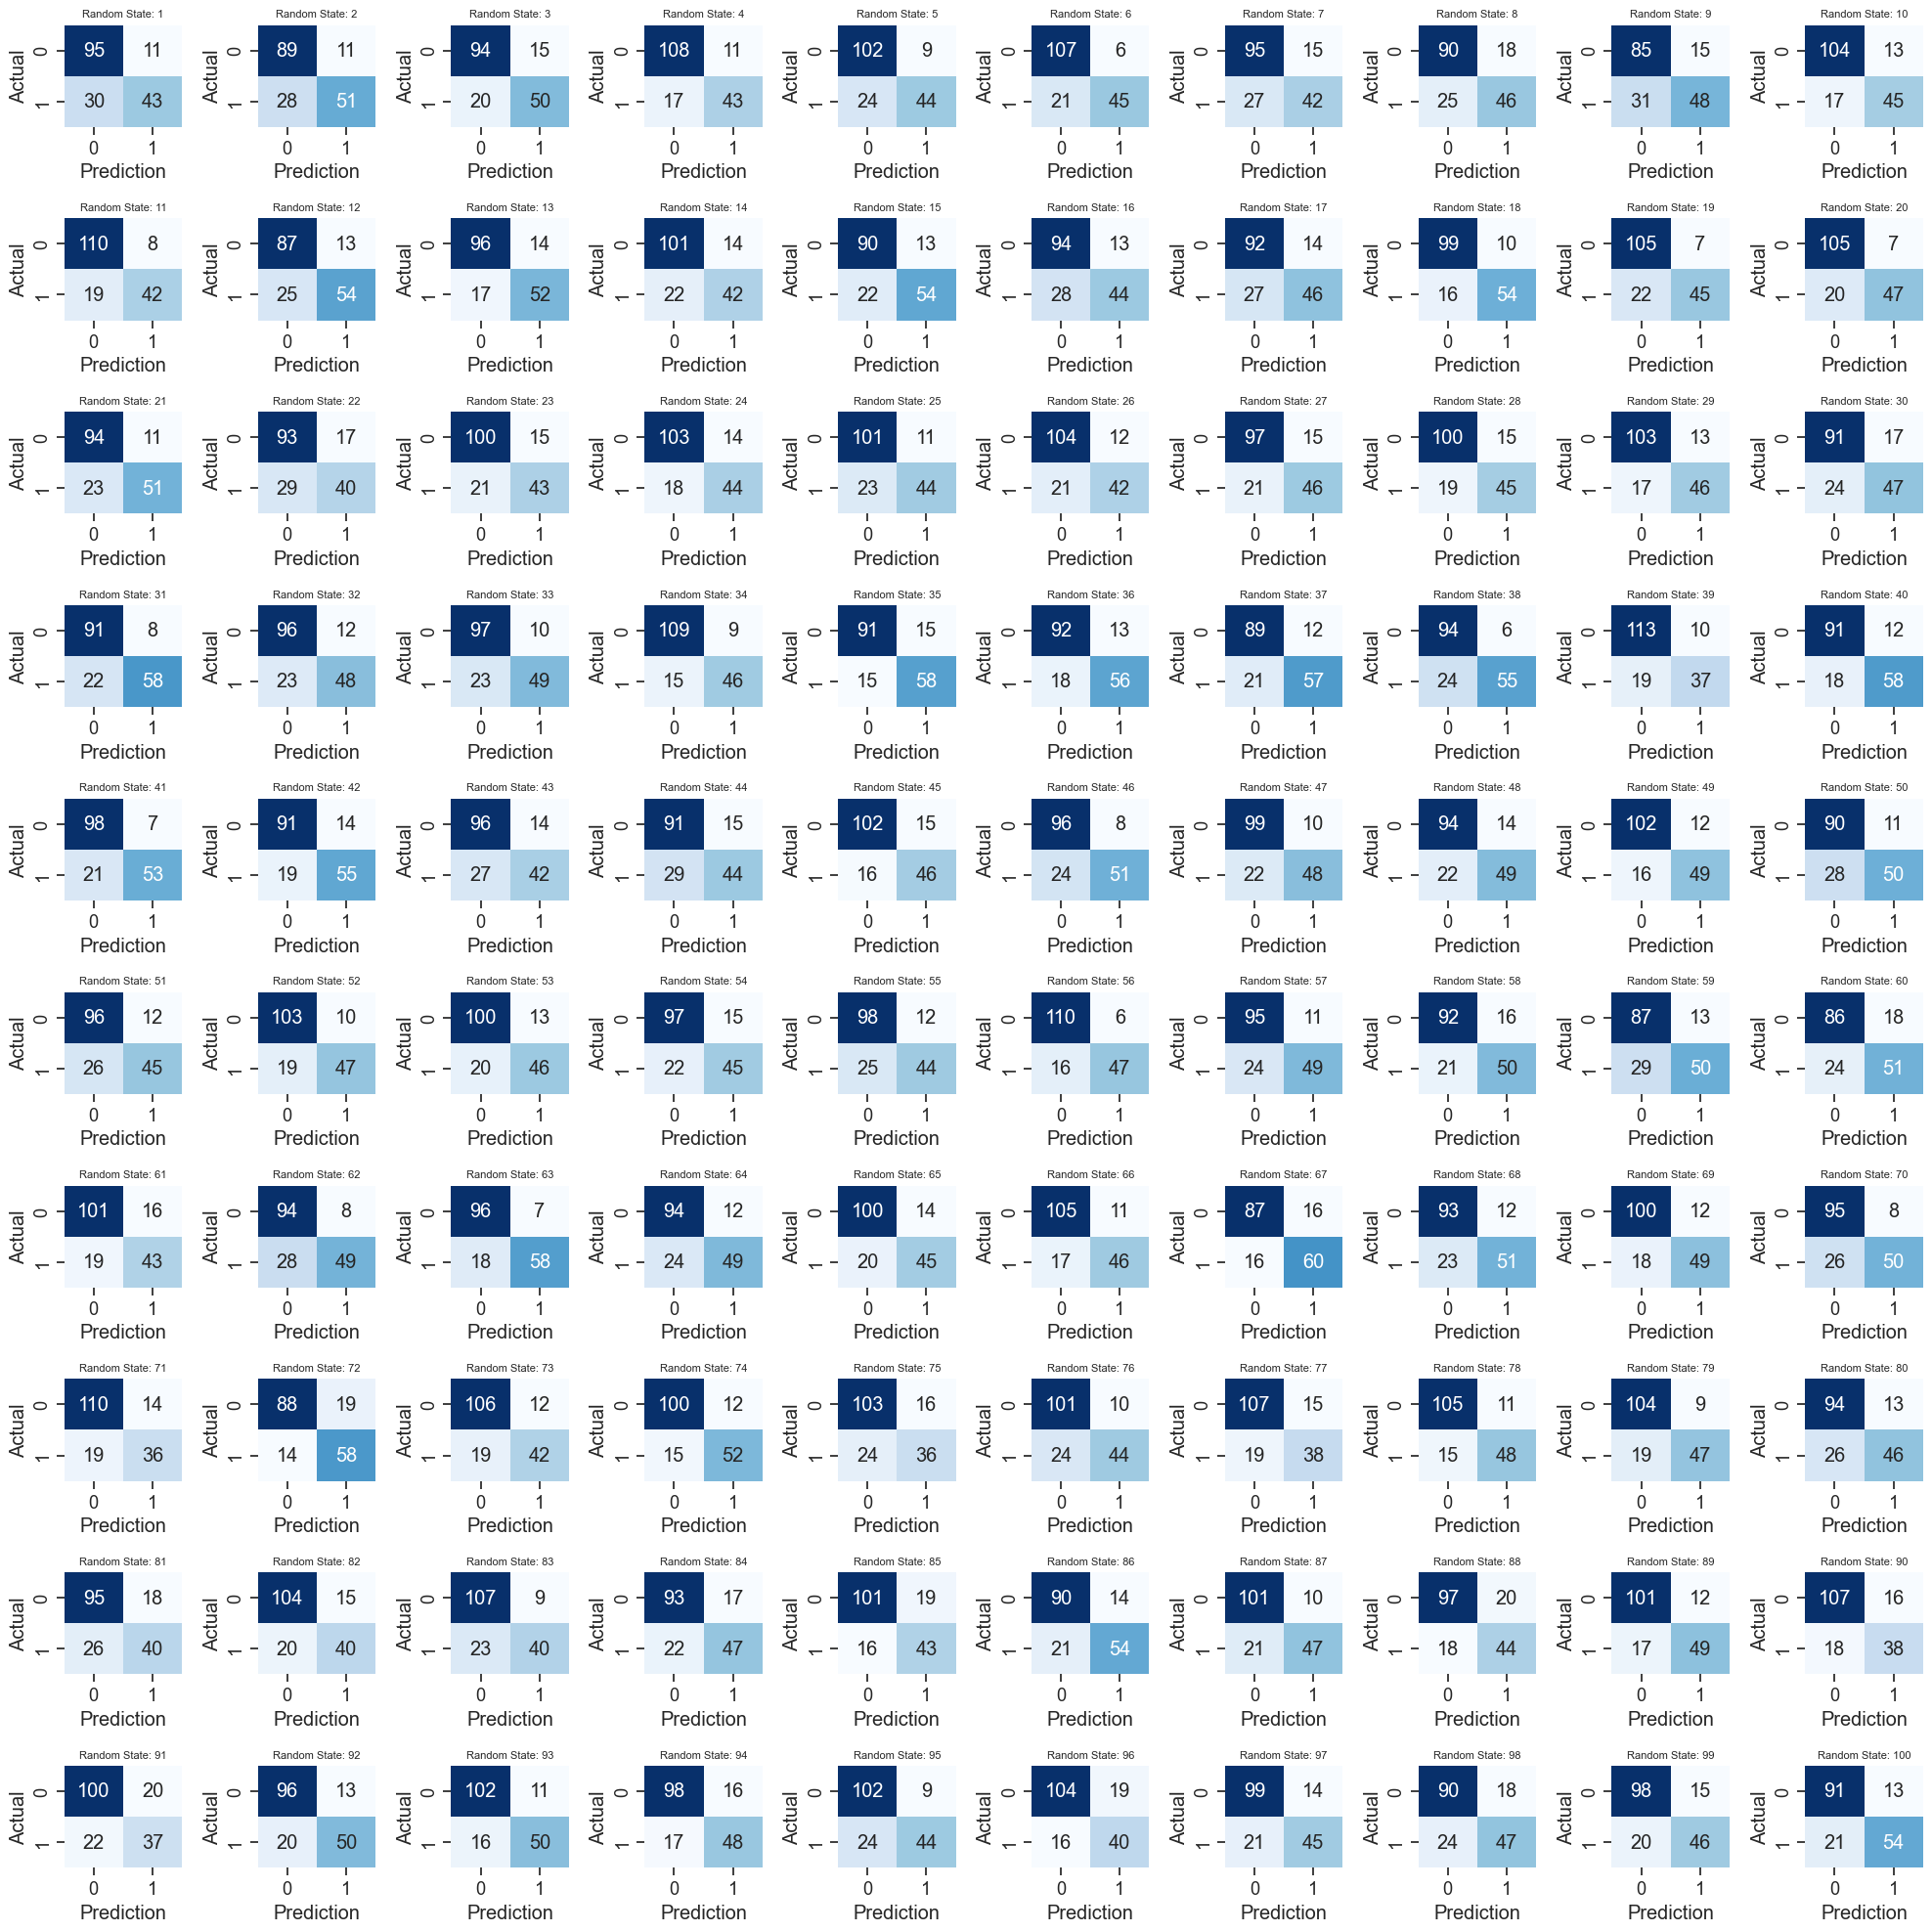

In [33]:
# Create a figure 10 x 10 
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
sns.set(font_scale=1.2)
sns.set_style('ticks')

#Lists which will contain the values of the Confussion Matrix
FN, FP, TN, TP = [],[],[],[]

for i in range(10):
    for j in range(10):
        random_state = i * 10 + j + 1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state) # 70% training and 30% test

        # Create Decision Tree classifer object
        clf = svm.SVC(kernel='linear')

        # Train Decision Tree Cl#assifer
        clf = clf.fit(X_train,y_train)

        #Predict the response for test dataset using the Decision Treee
        y_pred = clf.predict(X_test)

        # Predict the response for the training dataset
        y_train_pred = clf.predict(X_train)

        # Calculate and print the accuracy for the training dataset
        train_accuracy = accuracy_score(y_train, y_train_pred)
        #print("Train Accuracy:", train_accuracy)

    
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        
        # Calculate the confusion matrix
        cf_matrix = confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(cf_matrix, index=[0,1], columns=[0,1])
        
        # Append values of confusion matrix to the list initialized earlier
        TN.append(df_cm.loc[0, 0])
        FN.append(df_cm.loc[1, 0])
        FP.append(df_cm.loc[0, 1])
        TP.append(df_cm.loc[1, 1])
        
        # Plot the confusion matrix on the corresponding subplot
        ax = axes[i, j]
        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

        ax.set_xlabel('Prediction')
        ax.set_ylabel('Actual')
        ax.set_title(f'Random State: {random_state}', fontsize=8)
        
        if random_state == 20:
            # Identify False Negatives
            false_negatives_indices = X_test[(y_test == 1) & (y_pred == 0)].index
            false_negatives_rows = train.loc[false_negatives_indices]

# Adjust layout to make sure titles and labels fit
plt.tight_layout()
plt.show()

In [34]:
# Convert lists to numpy arrays
FN = np.array(FN)
FP = np.array(FP)
TN = np.array(TN)
TP = np.array(TP)

# Calculate aggregated metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TN + TP) / (TP + TN + FP + FN)

print("Aggregated Precision:", np.mean(precision))
print("Aggregated Recall:", np.mean(recall))
print("Aggregated Accuracy:", np.mean(accuracy))

Aggregated Precision: 0.7873907767375915
Aggregated Recall: 0.6893144003606522
Aggregated Accuracy: 0.8098882681564246


### 4.23 Neural Network

## 5. Conclusions

In order to see if what we did is relevant or not, we have to compare our results to some scenarios:

1. What if we assume everyone died from a sample ?

2. What if all females survive and all males die from a sample ?

3. What is the prediction obtained with our model on kaggle vs the one in question 2 ?

In [30]:
#Question1:
y_test_question_1 = [0] * len(y_test)
question_1_accuracy = accuracy_score(y_test, y_test_question_1)
print("Question 1 (Assume everyone died) Accuracy:", question_1_accuracy)

Question 1 (Assume everyone died) Accuracy: 0.5810055865921788


In [31]:
#Question2:
y_test_question_2 = [1 if sex == 1 else 0 for sex in X_test['Sex']]
question_2_accuracy = accuracy_score(y_test, y_test_question_2)
print("Baseline 2 (All females survive, all males die) Accuracy:", question_2_accuracy)

Baseline 2 (All females survive, all males die) Accuracy: 0.7877094972067039


In [39]:
#Question3:

# Create the gender-based submission DataFrame
hard_coding_submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test["Sex"].map({"female": 1, "male": 0})
})

# Set PassengerId as the index
hard_coding_submission = hard_coding_submission.set_index("PassengerId")

hard_coding_submission.to_csv("hard_coding_submission.csv")

For Question 3, we obtain with our model 0.779, whereas if we make hard cording of Sex, we obtain 0.622